In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Kaggle API
import os
os.environ['KAGGLE_USERNAME'] = "apanpa"
os.environ['KAGGLE_KEY'] = "c2e92bf0b22a59f21ed0440cc6e40b6e"

In [4]:
# Downloading the dataset directly from Kaggle on the Colab environment 

!kaggle competitions download -c tabular-playground-series-jan-2022

tabular-playground-series-jan-2022.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
# Unzipping the dataset
! unzip/edit/Desktop/DataScience/kaggel/tabular-playground-series-jan-2022.zip
#! unzip/content/tabular-playground-series-jan-2022.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
train = pd.read_csv('https://raw.githubusercontent.com/abolayo/DScience/master/kaggel/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/abolayo/DScience/master/kaggel/test.csv')
#C:\Users\Med's PC\Desktop\DataScience\kaggel

In [7]:
#vitualize first 10 rows of the train data-set
train.head(10)

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911
5,5,2015-01-01,Finland,KaggleRama,Kaggle Sticker,283
6,6,2015-01-01,Norway,KaggleMart,Kaggle Mug,526
7,7,2015-01-01,Norway,KaggleMart,Kaggle Hat,906
8,8,2015-01-01,Norway,KaggleMart,Kaggle Sticker,250
9,9,2015-01-01,Norway,KaggleRama,Kaggle Mug,1005


In [8]:
#vitualize first 10 rows of the test data-set
test.head(10)

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat
5,26303,2019-01-01,Finland,KaggleRama,Kaggle Sticker
6,26304,2019-01-01,Norway,KaggleMart,Kaggle Mug
7,26305,2019-01-01,Norway,KaggleMart,Kaggle Hat
8,26306,2019-01-01,Norway,KaggleMart,Kaggle Sticker
9,26307,2019-01-01,Norway,KaggleRama,Kaggle Mug


In [9]:
#summarized infomation on the test data-set
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    26298 non-null  int64 
 1   date      26298 non-null  object
 2   country   26298 non-null  object
 3   store     26298 non-null  object
 4   product   26298 non-null  object
 5   num_sold  26298 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.2+ MB


# extractioning unique values of the train data-set and their value counts
uniqueNations = train['country'].value_counts()
uniqueStores = train['store'].value_counts()
uniqueProducts = train['product'].value_counts()
print(uniqueNations)
print(uniqueStores)
print(uniqueProducts)

**From the data exploration, the following are noticed**
* The data contains 6 features including the target feature and 26297 entries
* 4 entries are object data-type, while 2 including the target feature are integers
* No missing values in the entries
* 3 unique locations, 3 products and 2 stores
* Equal distributions in respect to location, store and product.


**DATA PREPROCESSING**

In [11]:
#Date column reformated to more suitable fields.
#converting objects to int
train['date'] = pd.to_datetime(train['date'], format = "%Y-%m-%d")
test['date'] = pd.to_datetime(test['date'], format = "%Y-%m-%d")


train['year'] = train['date'].apply(lambda x: x.year)
train['month'] = train['date'].apply(lambda x: x.month)
train['day'] = train['date'].apply(lambda x: x.day)

test['year'] = test['date'].apply(lambda x: x.year)
test['month'] = test['date'].apply(lambda x: x.month)
test['day'] = test['date'].apply(lambda x: x.day)

In [12]:
train.head(5)

,row_id,date,country,store,product,num_sold,year,month,day
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,2015,1,1
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,2015,1,1
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,2015,1,1
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,2015,1,1
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,2015,1,1


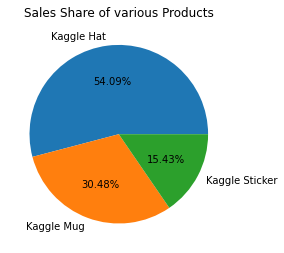

In [13]:
#visualiized various product sales
fig = plt.figure(figsize  = (4,8)) 
products = train.groupby('product').num_sold.sum()
plt.pie(products.values, labels = products.index,  autopct='%0.2f%%')
plt.title('Sales Share of various Products')
plt.show()

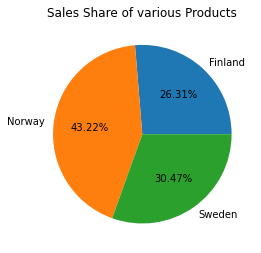

In [14]:
#visualiized various product sales
fig = plt.figure(figsize  = (4,8)) 
products = train.groupby('country').num_sold.sum()
plt.pie(products.values, labels = products.index,  autopct='%0.2f%%')
plt.title('Sales Share of various Products')
plt.show()

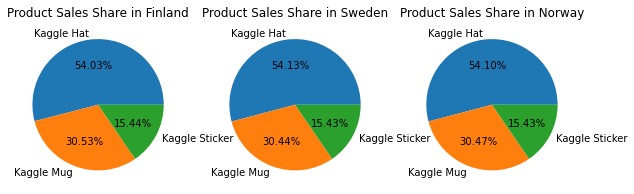

In [15]:
#product sales per country
fig = plt.figure(figsize  = (10,8)) 
countries = ['Finland','Sweden','Norway']
for i in range(3):
    countrySales = train[train['country'] == countries[i]].groupby('product').num_sold.sum()
    ax = fig.add_subplot(1,3,i+1)
    ax.pie(countrySales.values, labels = countrySales.index,  autopct='%0.2f%%')
    ax.title.set_text(f'Product Sales Share in {countries[i]}')

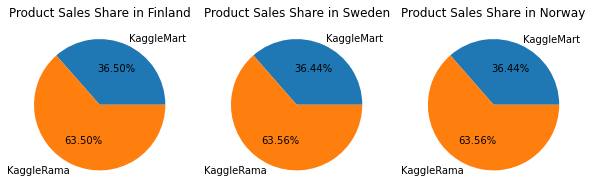

In [16]:
#product sales per country
fig = plt.figure(figsize  = (10,8)) 
countries = ['Finland','Sweden','Norway']
for i in range(3):
    countrySales = train[train['country'] == countries[i]].groupby('store').num_sold.sum()
    ax = fig.add_subplot(1,3,i+1)
    ax.pie(countrySales.values, labels = countrySales.index,  autopct='%0.2f%%')
    ax.title.set_text(f'Product Sales Share in {countries[i]}')

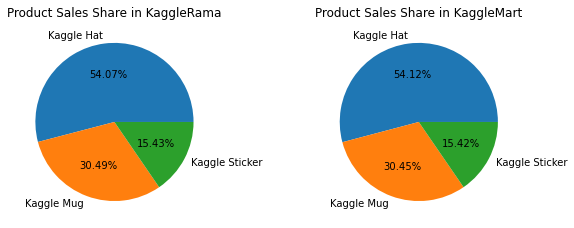

In [17]:
fig = plt.figure(figsize  = (10,8)) 

rand =221
series = train[train['store'] == 'KaggleRama'].groupby('product').num_sold.sum()
ax1 = fig.add_subplot(221)
ax1.pie(series.values, labels = series.index,  autopct='%0.2f%%')
ax1.title.set_text(f'Product Sales Share in KaggleRama')

series = train[train['store'] == 'KaggleMart'].groupby('product').num_sold.sum()
ax2 = fig.add_subplot(222)
ax2.pie(series.values, labels = series.index,  autopct='%0.2f%%')
ax2.title.set_text(f'Product Sales Share in KaggleMart')

**From the visualization, the following can be deduced:**
* the sales pattern in the three countries are very similar, in respect to product item.
* Hat is most popular,while sticker is least popular.
* Sales are better at all KaggleRama (about 67%) to KaggelMart.
* Highest sales comes from Norway, as the least is from Finland.

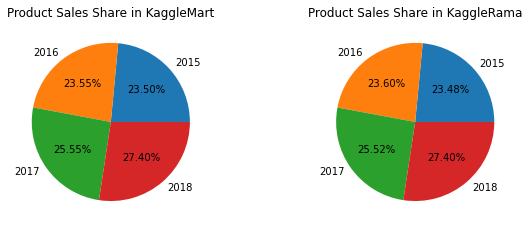

In [18]:
#Exploring with date as a variable
fig = plt.figure(figsize  = (10,8)) 
rand =221
series = train[train['store'] == 'KaggleMart'].groupby('year').num_sold.sum()
ax2 = fig.add_subplot(221)
ax2.pie(series.values, labels = series.index,  autopct='%0.2f%%')
ax2.title.set_text(f'Product Sales Share in KaggleMart')

series = train[train['store'] == 'KaggleRama'].groupby('year').num_sold.sum()
ax2 = fig.add_subplot(222)
ax2.pie(series.values, labels = series.index,  autopct='%0.2f%%')
ax2.title.set_text(f'Product Sales Share in KaggleRama')

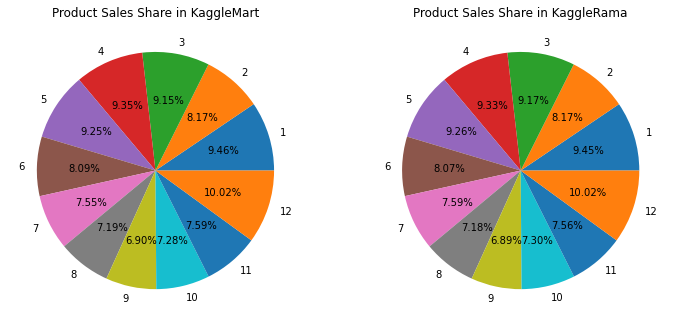

In [19]:
fig = plt.figure(figsize  = (12,12)) 
rand =221
series = train[train['store'] == 'KaggleMart'].groupby('month').num_sold.sum()
ax2 = fig.add_subplot(221)
ax2.pie(series.values, labels = series.index,  autopct='%0.2f%%')
ax2.title.set_text(f'Product Sales Share in KaggleMart')

series = train[train['store'] == 'KaggleRama'].groupby('month').num_sold.sum()
ax2 = fig.add_subplot(222)
ax2.pie(series.values, labels = series.index,  autopct='%0.2f%%')
ax2.title.set_text(f'Product Sales Share in KaggleRama')

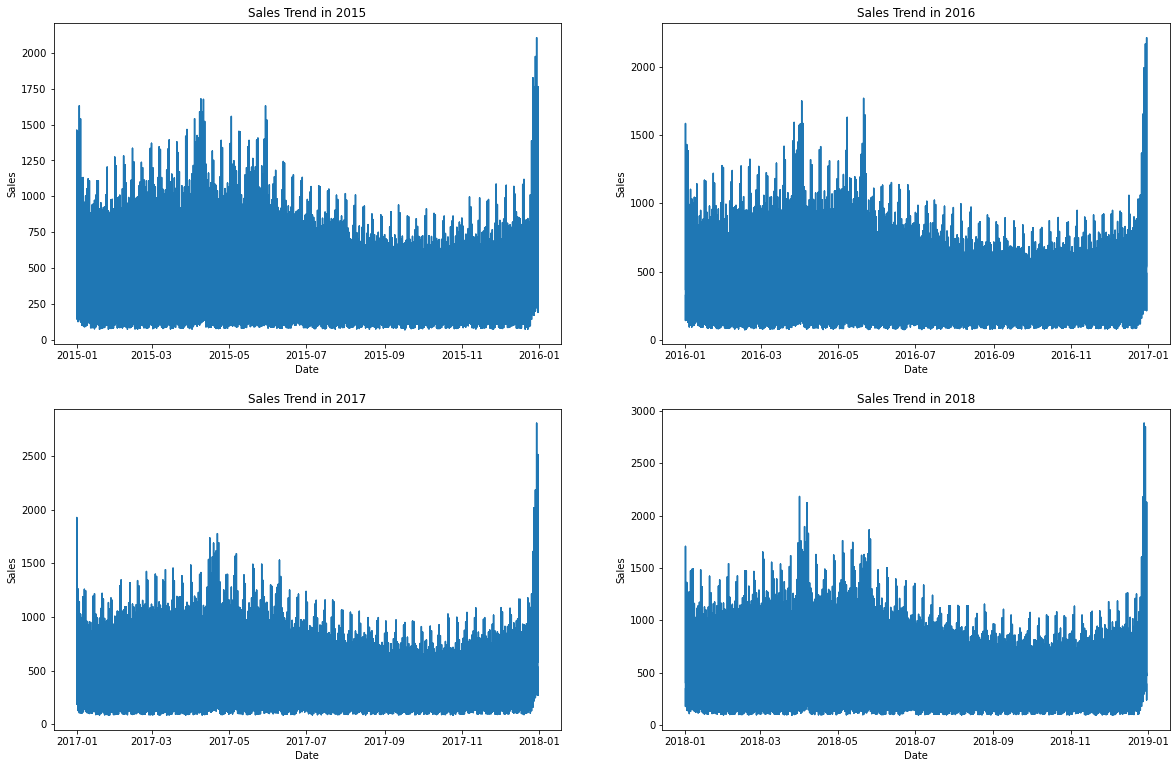

In [20]:
fig = plt.figure(figsize  = (20,13)) 
year = 2015
for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    ax.plot(train[train['year']==year]['date'], train[train['year']==year]['num_sold'])
    ax.title.set_text(f'Sales Trend in {year}')
    ax.set_ylabel('Sales')
    ax.set_xlabel('Date')
    year+=1

Text(0.5, 0, 'Days of Week')

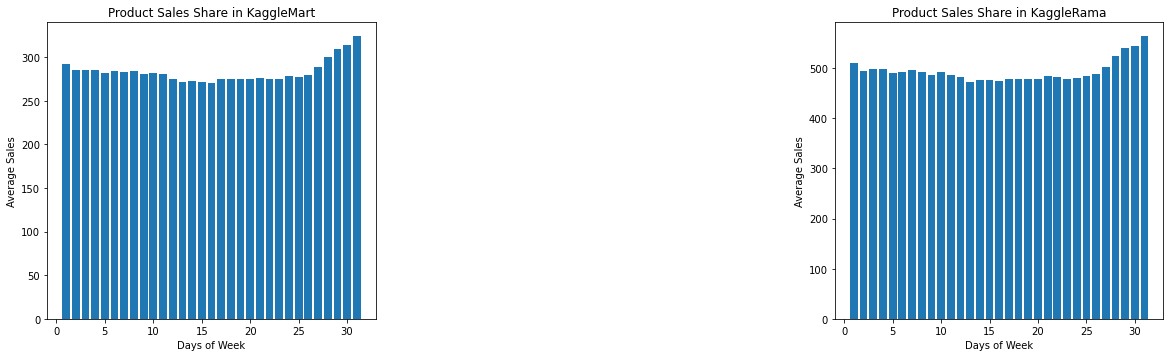

In [21]:
fig = plt.figure(figsize  = (20,12)) 

series = train[train['store'] == 'KaggleMart'].groupby('day').num_sold.mean()
ax1 = fig.add_subplot(231)
ax1.bar(x = series.index, height = series.values)
ax1.title.set_text(f'Product Sales Share in KaggleMart')
ax1.set_ylabel('Average Sales')
ax1.set_xlabel('Days of Week')
    
series = train[train['store'] == 'KaggleRama'].groupby('day').num_sold.mean()
ax1 = fig.add_subplot(233)
ax1.bar(x = series.index, height = series.values)
ax1.title.set_text(f'Product Sales Share in KaggleRama')
ax1.set_ylabel('Average Sales')
ax1.set_xlabel('Days of Week')



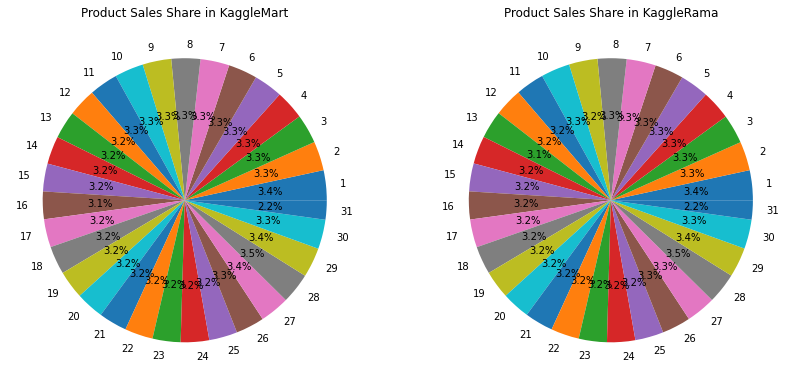

In [22]:
fig = plt.figure(figsize  = (14,16)) 
series = train[train['store'] == 'KaggleMart'].groupby('day').num_sold.sum()
ax2 = fig.add_subplot(221)
ax2.pie(series.values, labels = series.index,  autopct='%0.1f%%')
ax2.title.set_text(f'Product Sales Share in KaggleMart')

series = train[train['store'] == 'KaggleRama'].groupby('day').num_sold.sum()
ax2 = fig.add_subplot(222)
ax2.pie(series.values, labels = series.index,  autopct='%0.1f%%')
ax2.title.set_text(f'Product Sales Share in KaggleRama')
   

In [23]:
#adding a column weekday which contains integers, 0 means Monday and 6 means Sunday using inbuild function
train['weekday'] = train['date'].apply(lambda x: x.weekday())
test['weekday'] = test['date'].apply(lambda x: x.weekday())

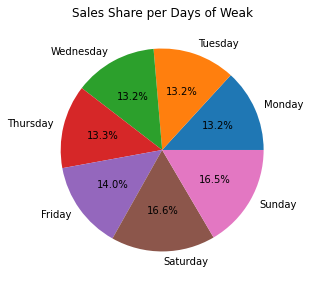

In [24]:
fig = plt.figure(figsize=(10,8))
series = train.groupby('weekday').num_sold.mean()
days_of_weak = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ax2 = fig.add_subplot(121)
ax2.pie(series.values, labels = [days_of_weak[i] for i in series.index], autopct = '%0.1f%%')
ax2.title.set_text(f'Sales Share per Days of Weak')

In [25]:
test.head()

,row_id,date,country,store,product,year,month,day,weekday
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug,2019,1,1,1
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat,2019,1,1,1
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker,2019,1,1,1
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug,2019,1,1,1
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat,2019,1,1,1


<AxesSubplot:>

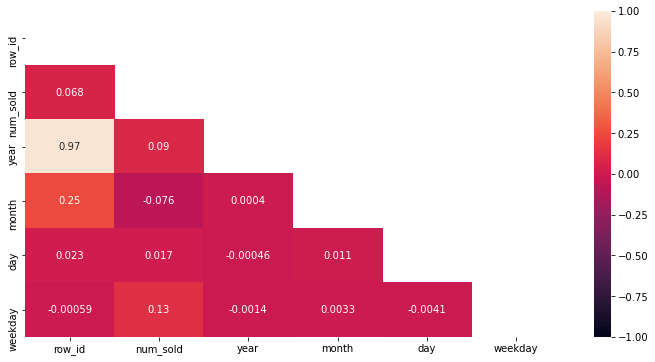

In [26]:
train.corr()
plt.figure(figsize=(12, 6))
mask = np.triu(np.ones_like(train.corr(), dtype=bool))
sns.heatmap(train.corr(), mask=mask, vmin=-1, vmax=1,annot=True)

**More insights**
* Sales are better during weekends.
* Sales are improves slightly towards the end of the months for each product.
* there is a seasonal pattern, that is continous all through the years under review.
* The steady growth in popularity of the goods gradual.
* No noticable correlation amongst features expect for product and number sold, a strong negative correlation

**Data preprocessing preparing for modeling**


In [27]:
# Since the below features have no correlation to the taget result, they can be droped
df_train = train.drop(['row_id','date','year'],axis = 1)
df_test = test.drop(['row_id','date','year'],axis = 1)

In [28]:
#preprocessing encoding the object features using label encoder
from sklearn.preprocessing import LabelEncoder

status_encoder = LabelEncoder()
df_train["country"] = status_encoder.fit_transform(df_train["country"])
df_train["store"] = status_encoder.fit_transform(df_train["store"])
df_train["product"] = status_encoder.fit_transform(df_train["product"])

df_test["country"] = status_encoder.fit_transform(df_test["country"])
df_test["store"] = status_encoder.fit_transform(df_test["store"])
df_test["product"] = status_encoder.fit_transform(df_test["product"])

df_train.tail()


,country,store,product,num_sold,month,day,weekday
26293,2,0,0,823,12,31,0
26294,2,0,2,250,12,31,0
26295,2,1,1,1004,12,31,0
26296,2,1,0,1441,12,31,0
26297,2,1,2,388,12,31,0


In [29]:
train_features = [col for col in df_train.columns if col!='num_sold']
X = df_train[train_features]
y = df_train['num_sold']

In [30]:
# Data spliting into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

**Modeling using different Models (LinearRegression,Ridge,Lasso and XGBoost)**


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Fit Models with Training Data set
from sklearn.linear_model import LinearRegression,Ridge,Lasso
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
predicted_value_1 = linear_model.predict(X_test)
print(linear_model.score(X_test, y_test))

0.6634604951269673


In [33]:
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(X_train,y_train)
predicted_value_2 = ridge_reg.predict(X_test)
print(ridge_reg.score(X_test, y_test))

0.6634598819684936


In [34]:
lasso_reg = Lasso(alpha=0.001) 
lasso_reg.fit(X_train, y_train)
predicted_value_3 = lasso_reg.predict(X_test)
print(lasso_reg.score(X_test, y_test))

0.663460495955758


In [35]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state = 42)
xgb.fit(X_train, y_train)
predicted_value_4 = xgb.predict(X_test)
print(xgb.score(X_test, y_test))

0.9720843875436377


*** Summary of the predicted score of the four models used ***
* Linear Regression gave 66.35% accuracy score
* Ridge 66.34%
* Lasso 66.35%
* XGBoost the best score of 97.21%
* futher analysis will be with XGBoost

In [36]:
predicted_value_4 = np.array(xgb.predict(X_test))
from sklearn.metrics import mean_squared_error
print(f"Mean Squared Error: {mean_squared_error(y_test, predicted_value_4)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, predicted_value_4))}")

Mean Squared Error: 1993.1404634119058
Root Mean Squared Error: 44.64460172755387


In [37]:
#tabular view of true value and predicted value
predictions = pd.DataFrame()
predictions['True value'] = y_test
predictions['Predicted value'] = predicted_value_4
predictions.head(20)

,True value,Predicted value
15429,397,410.930359
14903,203,230.937759
2973,228,249.242188
15267,316,306.857758
22153,514,446.316986
4119,310,327.819061
13943,266,275.283112
8588,94,84.443123
16074,163,166.632690
4774,430,440.205688


<AxesSubplot:>

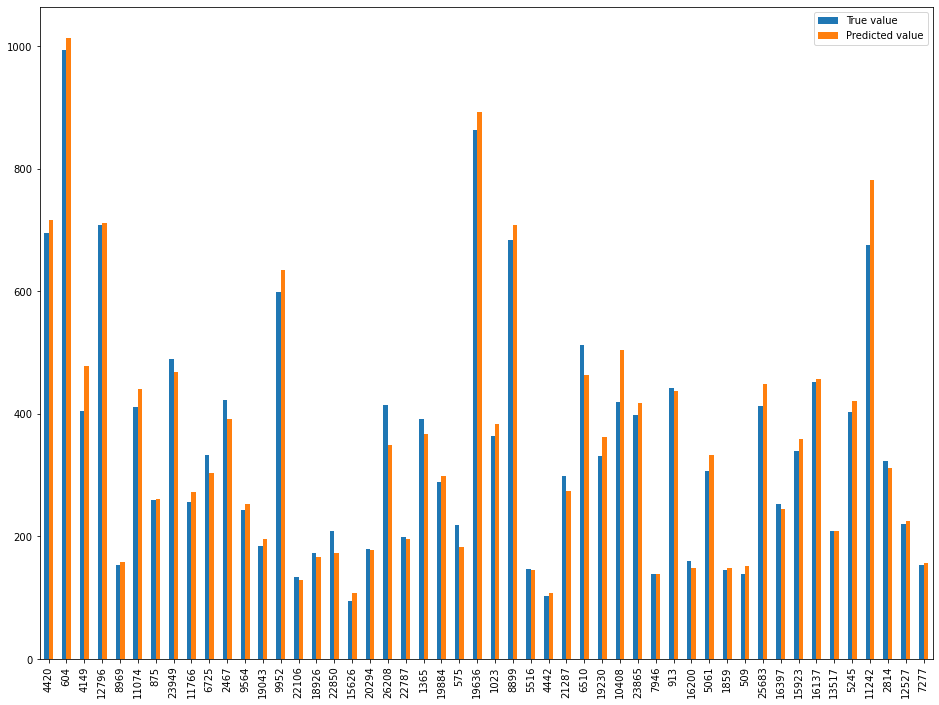

In [38]:
#plotting the predictions on the bar plot to have a visual view
predictions[["True value", "Predicted value"]].iloc[-50:].plot(kind="bar", figsize=(16, 12))

In [39]:
# Baseline submission getting ready
predicted_value_4 = xgb.predict(df_test)

submission_df = pd.DataFrame({'row_id':test['row_id'],'num_sold':predicted_value_4})
submission_df.to_csv('submit_baseline.csv', index = False)
submission_df

,row_id,num_sold
0,26298,433.890381
1,26299,593.043091
2,26300,205.398300
3,26301,708.077820
4,26302,1012.195374
...,...,...
6565,32863,851.493347
6566,32864,228.994186
6567,32865,979.354675
6568,32866,1462.274536
